In [286]:
# Create a titanic survival program for prediction
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [287]:
# Load the data
data= pd.read_csv('../train.csv')


In [288]:
# data preprocessing
data.head()


,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [289]:
data.shape


(891, 11)

In [290]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [291]:
# check the null values in data
data.isnull().sum()


survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [292]:
# drop the cabin columns
titanic_data= data.drop(columns='cabin', axis=1)


In [293]:
titanic_data.shape


(891, 10)

In [294]:
# replace  the age null value and missing value
titanic_data['age'].fillna(titanic_data['age'].interpolate())
print(titanic_data)


     survived  pclass                                               name  \
0           0       3                            Braund, Mr. Owen Harris   
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2           1       3                             Heikkinen, Miss. Laina   
3           1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4           0       3                           Allen, Mr. William Henry   
..        ...     ...                                                ...   
886         0       2                              Montvila, Rev. Juozas   
887         1       1                       Graham, Miss. Margaret Edith   
888         0       3           Johnston, Miss. Catherine Helen "Carrie"   
889         1       1                              Behr, Mr. Karl Howell   
890         0       3                                Dooley, Mr. Patrick   

        sex   age  sibsp  parch            ticket     fare embarked  
0      male  22.0

In [295]:
# replacing missing values is embarked with mode
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0],inplace=True)


C:\Users\ANADIL\AppData\Local\Temp\ipykernel_5788\3570630183.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0],inplace=True)


In [296]:
titanic_data.isnull().sum()


survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
embarked      0
dtype: int64

In [297]:
titanic_data.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [298]:
titanic_data['survived'].value_counts()


survived
0    549
1    342
Name: count, dtype: int64

In [299]:
## Data visualisation
sns.set()


C:\Users\ANADIL\AppData\Local\Temp\ipykernel_5788\814615853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=titanic_data, palette='Set2')


<Axes: xlabel='survived', ylabel='count'>

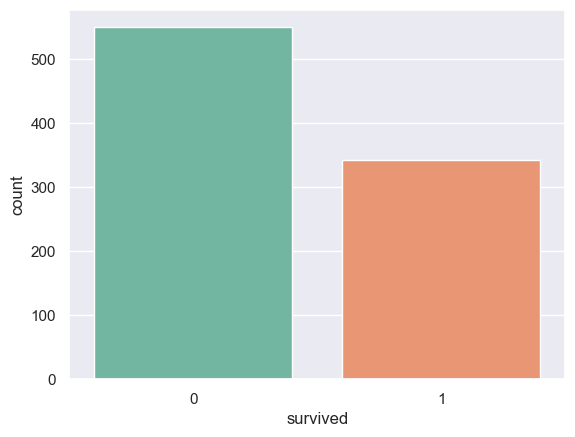

In [300]:
sns.countplot(x='survived', data=titanic_data, palette='Set2')


In [301]:
## find out the male and female
titanic_data['sex'].value_counts()


sex
male      577
female    314
Name: count, dtype: int64

C:\Users\ANADIL\AppData\Local\Temp\ipykernel_5788\2244238482.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=titanic_data, palette='Set2')


<Axes: xlabel='sex', ylabel='count'>

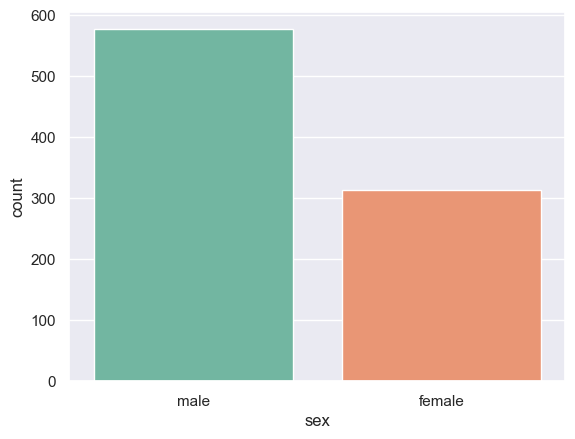

In [302]:
sns.countplot(x='sex', data=titanic_data, palette='Set2')


<Axes: xlabel='sex', ylabel='count'>

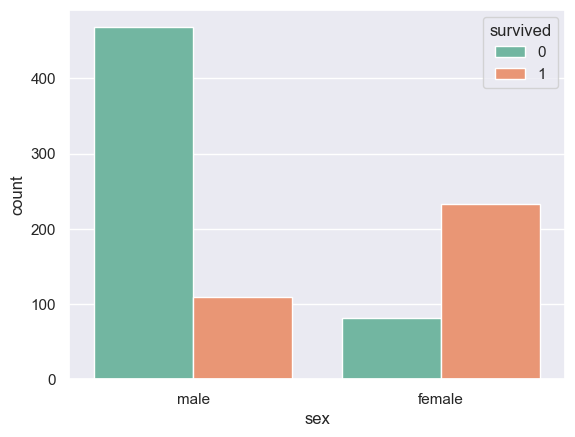

In [303]:
# how much male survive and how much female survive
sns.countplot(x='sex',hue='survived' ,data=titanic_data, palette='Set2')


C:\Users\ANADIL\AppData\Local\Temp\ipykernel_5788\3338161946.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=titanic_data, palette='Set2')


<Axes: xlabel='pclass', ylabel='count'>

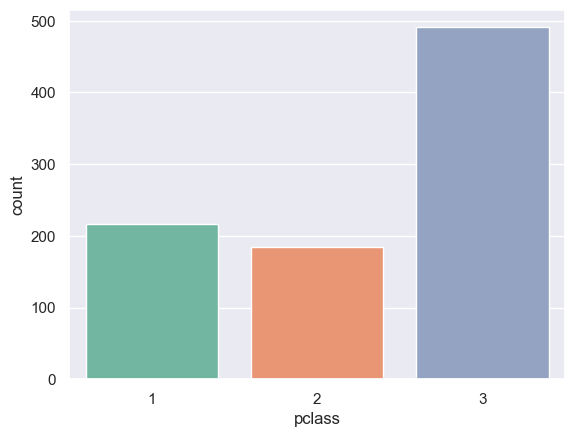

In [304]:
## check the how much people survive in pclass
sns.countplot(x='pclass', data=titanic_data, palette='Set2')


In [305]:
## Encode the data
titanic_data['sex'].value_counts()


sex
male      577
female    314
Name: count, dtype: int64

In [306]:
titanic_data['embarked'].value_counts()


embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [307]:
# encoding embarked data in numerical
replaced_data =titanic_data.replace({'embarked':{'S':0,'C':1,'Q':2},'sex':{'male':0, 'female':1} })


C:\Users\ANADIL\AppData\Local\Temp\ipykernel_5788\2173784644.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  replaced_data =titanic_data.replace({'embarked':{'S':0,'C':1,'Q':2},'sex':{'male':0, 'female':1} })


In [308]:
# split the data
x= replaced_data.drop(columns=['name','ticket','survived'], axis=1)
y= replaced_data['survived']


In [309]:
print(x)


     pclass  sex   age  sibsp  parch     fare  embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1   NaN      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[891 rows x 7 columns]


In [310]:
print(y)


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


In [311]:
# train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)


In [312]:
print(x.shape, x_train.shape, y_train.shape)


(891, 7) (712, 7) (712,)


In [313]:
x_train['age']= x_train['age'].fillna(0)
print(x_train)


     pclass  sex   age  sibsp  parch      fare  embarked
30        1    0  40.0      0      0   27.7208         1
10        3    1   4.0      1      1   16.7000         0
873       3    0  47.0      0      0    9.0000         0
182       3    0   9.0      4      2   31.3875         0
876       3    0  20.0      0      0    9.8458         0
..      ...  ...   ...    ...    ...       ...       ...
534       3    1  30.0      0      0    8.6625         0
584       3    0   0.0      0      0    8.7125         1
493       1    0  71.0      0      0   49.5042         1
527       1    0   0.0      0      0  221.7792         0
168       1    0   0.0      0      0   25.9250         0

[712 rows x 7 columns]


In [314]:
print(y_train)


30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: survived, Length: 712, dtype: int64


In [315]:
# train the model
model= LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [316]:
# model Evalution
x_train_prediction= model.predict(x_train)
acc_score= accuracy_score(x_train_prediction, y_train)


In [317]:
print(x_train_prediction)


[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 1 0 1 1 1 1 0 

In [318]:
print(acc_score)


0.8061797752808989


In [319]:
x_test['age']= x_test['age'].fillna(0)


In [320]:
print(x_test)
print(y_test)


     pclass  sex   age  sibsp  parch     fare  embarked
707       1    0  42.0      0      0  26.2875         0
37        3    0  21.0      0      0   8.0500         0
615       2    1  24.0      1      2  65.0000         0
169       3    0  28.0      0      0  56.4958         0
68        3    1  17.0      4      2   7.9250         0
..      ...  ...   ...    ...    ...      ...       ...
89        3    0  24.0      0      0   8.0500         0
80        3    0  22.0      0      0   9.0000         0
846       3    0   0.0      8      2  69.5500         0
870       3    0  26.0      0      0   7.8958         0
251       3    1  29.0      1      1  10.4625         0

[179 rows x 7 columns]
707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: survived, Length: 179, dtype: int64


In [321]:
## test data prediction and accuracy score
x_test_prediction= model.predict(x_test)
acc_score_test= accuracy_score(x_test_prediction, y_test)


In [322]:
print(x_test_prediction)


[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [323]:
print(acc_score_test)


0.776536312849162
